# Project: Dog vs Cat Classification

In [620]:
from pathlib import Path
import os
import torch
from torch import nn

In [621]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [622]:
data_path = Path("data/")
train_path = data_path / "train"
test_path = data_path / "test"

train_path, test_path

(WindowsPath('data/train'), WindowsPath('data/test'))

In [623]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Cat, Shape: (332, 500, 3)')

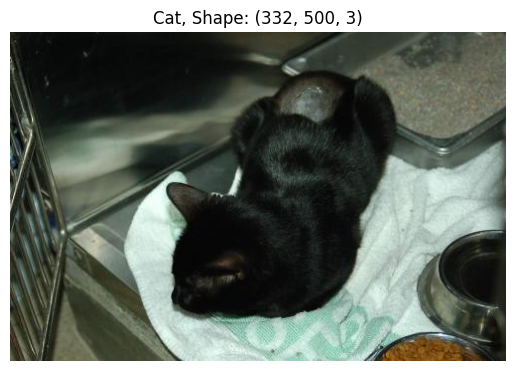

In [624]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
image_path_list = list(data_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)
img_is_array = np.asarray(img)

plt.imshow(img)
plt.axis(False)
plt.title(f"{image_class}, Shape: {img_is_array.shape}")

In [625]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [626]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [627]:
transformed_image = data_transform(img)
transformed_image

tensor([[[0.1098, 0.0667, 0.0549,  ..., 0.3529, 0.3137, 0.3020],
         [0.1137, 0.0667, 0.0471,  ..., 0.3608, 0.3608, 0.3451],
         [0.1294, 0.0627, 0.0431,  ..., 0.3451, 0.3529, 0.3529],
         ...,
         [0.2314, 0.3294, 0.2980,  ..., 0.1294, 0.0627, 0.0784],
         [0.2510, 0.3098, 0.3020,  ..., 0.1137, 0.0980, 0.1294],
         [0.2784, 0.2902, 0.3059,  ..., 0.1020, 0.0980, 0.1255]],

        [[0.1176, 0.0784, 0.0627,  ..., 0.3725, 0.3294, 0.3176],
         [0.1255, 0.0745, 0.0549,  ..., 0.3686, 0.3608, 0.3529],
         [0.1412, 0.0706, 0.0510,  ..., 0.3569, 0.3647, 0.3608],
         ...,
         [0.2118, 0.3216, 0.3098,  ..., 0.1373, 0.0667, 0.0824],
         [0.2431, 0.3020, 0.3059,  ..., 0.1137, 0.1059, 0.1373],
         [0.2824, 0.2745, 0.3176,  ..., 0.0941, 0.1098, 0.1373]],

        [[0.0902, 0.0627, 0.0588,  ..., 0.3176, 0.2745, 0.2706],
         [0.0941, 0.0588, 0.0510,  ..., 0.3098, 0.2941, 0.2941],
         [0.1098, 0.0549, 0.0471,  ..., 0.3020, 0.3098, 0.

Text(0.5, 1.0, 'Cat, Shape: torch.Size([3, 64, 64])')

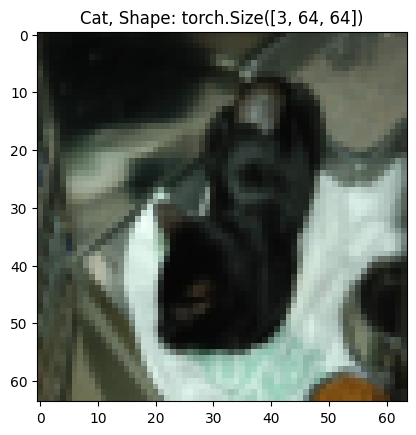

In [628]:
plt.imshow(transformed_image.permute(1, 2, 0))
plt.title(f"{image_class}, Shape: {transformed_image.shape}")

# Loading data using 'ImageFolder'

In [629]:
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_path,
                                 transform=test_data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 642
     Root location: data\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 160
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [630]:
# Get class names as list
class_names = train_data.classes
class_names

['Cat', 'Dog']

In [631]:
# Get class names as dictionary 
class_dict = train_data.class_to_idx
class_dict

{'Cat': 0, 'Dog': 1}

In [632]:
len(train_data), len(test_data)

(642, 160)

# Turn loaded images into 'DataLoader'

In [633]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1d080489580>,
 <torch.utils.data.dataloader.DataLoader at 0x1d080489f70>)

In [634]:
img_custom, label_custom = next(iter(train_dataloader))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [635]:
class DogVsCat(nn.Module):
    def __init__(self, input_shape, hidden_layers, output_shape):
        super().__init__()

        self.conv_block_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_block_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.classification = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layers*16*16,
                      out_features=output_shape)
        )

    def forward(self, x):
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_1(x)
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_2(x)
        #print(f"Shape: {x.shape}")
        x = self.classification(x)
        #print(f"Shape: {x.shape}")
        return x
        

In [636]:
model_0 = DogVsCat(input_shape=3, hidden_layers=16, output_shape=1).to(device)
model_0

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Seq

In [637]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [638]:
# Check the correct shape on dummy tensor
dummy_input = torch.randn(32, 3, 64, 64)
output = model_0(dummy_input.to(device))
output

tensor([[ 0.0986],
        [-0.1498],
        [ 0.2951],
        [ 0.1051],
        [ 1.0201],
        [-0.3239],
        [ 0.6237],
        [ 0.1038],
        [-0.4013],
        [-0.1874],
        [ 0.4461],
        [ 0.6311],
        [ 0.0286],
        [-0.0125],
        [-0.2741],
        [ 0.3306],
        [ 0.8071],
        [ 0.7898],
        [-0.5853],
        [ 0.0832],
        [-0.1270],
        [ 0.0786],
        [ 0.5646],
        [ 0.6283],
        [ 0.1175],
        [-0.2552],
        [ 0.1907],
        [ 0.1072],
        [-0.8132],
        [ 0.1151],
        [ 0.3147],
        [-0.2988]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [639]:
from tqdm import tqdm
import time

In [640]:
epochs = 5

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    model_0.train()
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        y = y.unsqueeze(dim=1).float()
        
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        train_acc += (y_pred_class==y).sum().item() / len(y_pred)

    train_loss /= len(train_dataloader)
    train_acc = (train_acc / len(train_dataloader)) * 100
    
    model_0.eval()
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model_0(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            test_acc += (test_pred_class==y).sum().item() / len(test_pred)
    
        test_loss /= len(test_dataloader)
        test_acc = (test_acc / len(test_dataloader)) * 100

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss}, Test Accuracy: {test_acc}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

 20%|██        | 1/5 [00:01<00:06,  1.70s/it]

Epoch: 0 | Train Loss: 0.7534, Train Accuracy: 55.80 | Test Loss: 0.6773127675056457, Test Accuracy: 51.24999999999999


 40%|████      | 2/5 [00:03<00:05,  1.84s/it]

Epoch: 1 | Train Loss: 0.6267, Train Accuracy: 65.03 | Test Loss: 0.6386636435985565, Test Accuracy: 61.25000000000001


 60%|██████    | 3/5 [00:05<00:03,  1.99s/it]

Epoch: 2 | Train Loss: 0.5487, Train Accuracy: 70.09 | Test Loss: 0.5750577092170716, Test Accuracy: 72.5


 80%|████████  | 4/5 [00:07<00:01,  1.87s/it]

Epoch: 3 | Train Loss: 0.5352, Train Accuracy: 71.88 | Test Loss: 0.7171436965465545, Test Accuracy: 61.875


100%|██████████| 5/5 [00:09<00:00,  1.81s/it]

Epoch: 4 | Train Loss: 0.5179, Train Accuracy: 72.62 | Test Loss: 0.6010523915290833, Test Accuracy: 73.125
Total time: 9.043338060379028


# Plot model_0 results

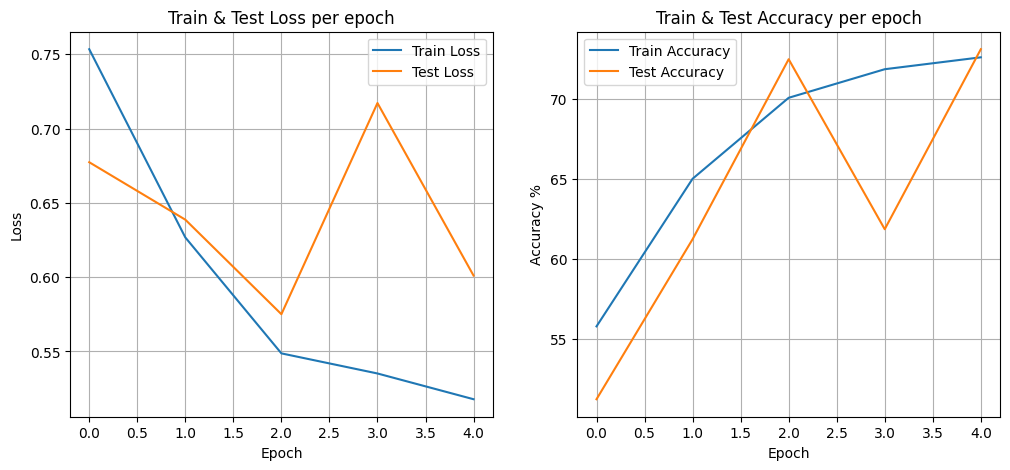

In [641]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()



In [642]:
print(len(results["train_loss"]), len(results["test_loss"]))
print(len(results["train_acc"]), len(results["test_acc"]))

5 5
5 5


In [643]:
# Build train and test function to make training easier
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               device=device):

    train_loss, correct_preds, total_samples = 0, 0, 0
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y = y.unsqueeze(dim=1).float()
        
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        #train_acc += (y_pred_class==y).sum().item() / len(y_pred)
        correct_preds += (y_pred_class == y).sum().item()
        total_samples += y.size(0)

    train_loss /= len(dataloader)
    #train_acc = (train_acc / len(dataloader)) * 100
    train_acc = (correct_preds / total_samples) * 100
    
    return train_loss, train_acc

In [644]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):

    test_loss, correct_preds, total_samples = 0, 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            #test_acc += (test_pred_class==y).sum().item() / len(test_pred)
            correct_preds += (test_pred_class == y).sum().item()
            total_samples += y.size(0)
    
    test_loss /= len(dataloader)
    #test_acc = (test_acc / len(dataloader)) * 100
    test_acc = (correct_preds / total_samples) * 100
    return test_loss, test_acc

# Augmentation data

In [645]:
train_data_transform_augmentation = transforms.Compose([
    #transforms.Resize(size=(64, 64)),
    transforms.RandomResizedCrop(size=(64, 64), scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    #transforms.RandomAffine(degrees=15, translate=(1, 1)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # used to differentiate the data
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

test_data = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
train_data_transform_augmentation, test_data

(Compose(
     RandomResizedCrop(size=(64, 64), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
     RandomHorizontalFlip(p=0.5)
     RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
     ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
     TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ))

In [646]:
train_data_augmentation = datasets.ImageFolder(root=train_path,
                                               transform=train_data_transform_augmentation)
test_data_augmentation = datasets.ImageFolder(root=test_path,
                                              transform=test_data)

train_data_augmentation, test_data_augmentation

(Dataset ImageFolder
     Number of datapoints: 642
     Root location: data\train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(64, 64), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ),
 Dataset ImageFolder
     Number of datapoints: 160
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normal

In [647]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader_augmentation = DataLoader(dataset=train_data_augmentation,
                                           batch_size=BATCH_SIZE,
                                           num_workers=NUM_WORKERS,
                                           shuffle=True)

test_dataloader_augmentation = DataLoader(dataset=test_data_augmentation,
                                          batch_size=BATCH_SIZE,
                                          num_workers=NUM_WORKERS,
                                          shuffle=False)

train_dataloader_augmentation, test_dataloader_augmentation

(<torch.utils.data.dataloader.DataLoader at 0x1d08ae919d0>,
 <torch.utils.data.dataloader.DataLoader at 0x1d08ae91df0>)

In [648]:
len(class_names)

2

In [649]:
model_1 = DogVsCat(input_shape=3, hidden_layers=8, output_shape=1).to(device)
model_1

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequential(
  

In [650]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.0001)
#optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01, momentum=0.9)
loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.0001
     maximize: False
     weight_decay: 0
 ))

In [651]:
# Train model_1 on augmentation data
epochs = 100

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    train_loss, train_acc = train_step(model=model_1,
               dataloader=train_dataloader_augmentation,
               loss_fn=loss_fn,
               optimizer=optimizer)

    test_loss, test_acc = test_step(model=model_1,
              dataloader=test_dataloader_augmentation,
              loss_fn=loss_fn)

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

  1%|          | 1/100 [00:02<04:37,  2.80s/it]

Epoch: 0 | Train Loss: 0.7015, Train Accuracy: 52.02 | Test Loss: 0.6932, Test Accuracy: 50.62


  2%|▏         | 2/100 [00:05<04:27,  2.73s/it]

Epoch: 1 | Train Loss: 0.7106, Train Accuracy: 54.67 | Test Loss: 0.6887, Test Accuracy: 48.12


  3%|▎         | 3/100 [00:08<04:19,  2.68s/it]

Epoch: 2 | Train Loss: 0.6861, Train Accuracy: 55.61 | Test Loss: 0.6881, Test Accuracy: 51.88


  4%|▍         | 4/100 [00:10<04:19,  2.70s/it]

Epoch: 3 | Train Loss: 0.7104, Train Accuracy: 57.17 | Test Loss: 0.6863, Test Accuracy: 50.62


  5%|▌         | 5/100 [00:13<04:12,  2.66s/it]

Epoch: 4 | Train Loss: 0.7057, Train Accuracy: 52.02 | Test Loss: 0.6857, Test Accuracy: 52.50


  6%|▌         | 6/100 [00:15<04:05,  2.61s/it]

Epoch: 5 | Train Loss: 0.6916, Train Accuracy: 51.71 | Test Loss: 0.6831, Test Accuracy: 56.25


  7%|▋         | 7/100 [00:18<04:07,  2.66s/it]

Epoch: 6 | Train Loss: 0.6923, Train Accuracy: 52.18 | Test Loss: 0.6859, Test Accuracy: 53.12


  8%|▊         | 8/100 [00:21<04:08,  2.71s/it]

Epoch: 7 | Train Loss: 0.6731, Train Accuracy: 56.70 | Test Loss: 0.6838, Test Accuracy: 52.50


  9%|▉         | 9/100 [00:24<04:03,  2.68s/it]

Epoch: 8 | Train Loss: 0.7052, Train Accuracy: 56.85 | Test Loss: 0.6835, Test Accuracy: 54.37


 10%|█         | 10/100 [00:26<03:56,  2.63s/it]

Epoch: 9 | Train Loss: 0.6895, Train Accuracy: 56.70 | Test Loss: 0.6828, Test Accuracy: 56.88


 11%|█         | 11/100 [00:29<03:51,  2.60s/it]

Epoch: 10 | Train Loss: 0.6805, Train Accuracy: 56.39 | Test Loss: 0.6817, Test Accuracy: 57.50


 12%|█▏        | 12/100 [00:31<03:46,  2.57s/it]

Epoch: 11 | Train Loss: 0.7051, Train Accuracy: 52.65 | Test Loss: 0.6804, Test Accuracy: 56.88


 13%|█▎        | 13/100 [00:34<03:45,  2.59s/it]

Epoch: 12 | Train Loss: 0.7036, Train Accuracy: 56.39 | Test Loss: 0.6764, Test Accuracy: 58.75


 14%|█▍        | 14/100 [00:36<03:42,  2.59s/it]

Epoch: 13 | Train Loss: 0.6725, Train Accuracy: 59.35 | Test Loss: 0.6798, Test Accuracy: 56.88


 15%|█▌        | 15/100 [00:39<03:46,  2.66s/it]

Epoch: 14 | Train Loss: 0.6755, Train Accuracy: 57.17 | Test Loss: 0.6800, Test Accuracy: 58.75


 16%|█▌        | 16/100 [00:42<03:45,  2.69s/it]

Epoch: 15 | Train Loss: 0.6713, Train Accuracy: 57.63 | Test Loss: 0.6790, Test Accuracy: 61.25


 17%|█▋        | 17/100 [00:45<03:51,  2.79s/it]

Epoch: 16 | Train Loss: 0.6831, Train Accuracy: 60.28 | Test Loss: 0.6786, Test Accuracy: 61.88


 18%|█▊        | 18/100 [00:48<03:56,  2.88s/it]

Epoch: 17 | Train Loss: 0.6952, Train Accuracy: 52.96 | Test Loss: 0.6765, Test Accuracy: 61.25


 19%|█▉        | 19/100 [00:51<03:52,  2.88s/it]

Epoch: 18 | Train Loss: 0.6642, Train Accuracy: 56.54 | Test Loss: 0.6768, Test Accuracy: 60.00


 20%|██        | 20/100 [00:54<03:46,  2.84s/it]

Epoch: 19 | Train Loss: 0.6801, Train Accuracy: 54.52 | Test Loss: 0.6757, Test Accuracy: 61.25


 21%|██        | 21/100 [00:57<03:47,  2.87s/it]

Epoch: 20 | Train Loss: 0.6650, Train Accuracy: 58.26 | Test Loss: 0.6768, Test Accuracy: 60.00


 22%|██▏       | 22/100 [00:59<03:38,  2.80s/it]

Epoch: 21 | Train Loss: 0.6498, Train Accuracy: 62.15 | Test Loss: 0.6759, Test Accuracy: 58.75


 23%|██▎       | 23/100 [01:02<03:28,  2.71s/it]

Epoch: 22 | Train Loss: 0.6738, Train Accuracy: 59.66 | Test Loss: 0.6756, Test Accuracy: 58.13


 24%|██▍       | 24/100 [01:04<03:22,  2.67s/it]

Epoch: 23 | Train Loss: 0.6814, Train Accuracy: 59.03 | Test Loss: 0.6754, Test Accuracy: 57.50


 25%|██▌       | 25/100 [01:07<03:17,  2.64s/it]

Epoch: 24 | Train Loss: 0.6570, Train Accuracy: 57.63 | Test Loss: 0.6729, Test Accuracy: 57.50


 26%|██▌       | 26/100 [01:10<03:13,  2.62s/it]

Epoch: 25 | Train Loss: 0.6655, Train Accuracy: 60.75 | Test Loss: 0.6730, Test Accuracy: 58.75


 27%|██▋       | 27/100 [01:12<03:15,  2.67s/it]

Epoch: 26 | Train Loss: 0.6465, Train Accuracy: 61.21 | Test Loss: 0.6730, Test Accuracy: 58.13


 28%|██▊       | 28/100 [01:15<03:11,  2.65s/it]

Epoch: 27 | Train Loss: 0.6543, Train Accuracy: 60.59 | Test Loss: 0.6662, Test Accuracy: 61.88


 29%|██▉       | 29/100 [01:17<03:06,  2.63s/it]

Epoch: 28 | Train Loss: 0.6642, Train Accuracy: 58.26 | Test Loss: 0.6653, Test Accuracy: 59.38


 30%|███       | 30/100 [01:20<03:07,  2.68s/it]

Epoch: 29 | Train Loss: 0.6681, Train Accuracy: 60.90 | Test Loss: 0.6652, Test Accuracy: 60.00


 31%|███       | 31/100 [01:23<03:07,  2.72s/it]

Epoch: 30 | Train Loss: 0.6579, Train Accuracy: 60.59 | Test Loss: 0.6641, Test Accuracy: 61.88


 32%|███▏      | 32/100 [01:26<03:01,  2.66s/it]

Epoch: 31 | Train Loss: 0.6696, Train Accuracy: 61.68 | Test Loss: 0.6657, Test Accuracy: 60.62


 33%|███▎      | 33/100 [01:28<02:58,  2.66s/it]

Epoch: 32 | Train Loss: 0.6617, Train Accuracy: 61.21 | Test Loss: 0.6652, Test Accuracy: 61.25


 34%|███▍      | 34/100 [01:31<02:53,  2.62s/it]

Epoch: 33 | Train Loss: 0.6440, Train Accuracy: 62.46 | Test Loss: 0.6717, Test Accuracy: 58.75


 35%|███▌      | 35/100 [01:33<02:48,  2.59s/it]

Epoch: 34 | Train Loss: 0.6444, Train Accuracy: 62.15 | Test Loss: 0.6715, Test Accuracy: 60.62


 36%|███▌      | 36/100 [01:36<02:45,  2.59s/it]

Epoch: 35 | Train Loss: 0.6918, Train Accuracy: 58.57 | Test Loss: 0.6662, Test Accuracy: 61.25


 37%|███▋      | 37/100 [01:39<02:43,  2.59s/it]

Epoch: 36 | Train Loss: 0.6563, Train Accuracy: 60.28 | Test Loss: 0.6673, Test Accuracy: 61.25


 38%|███▊      | 38/100 [01:41<02:38,  2.56s/it]

Epoch: 37 | Train Loss: 0.6733, Train Accuracy: 59.50 | Test Loss: 0.6631, Test Accuracy: 61.25


 39%|███▉      | 39/100 [01:44<02:37,  2.58s/it]

Epoch: 38 | Train Loss: 0.6394, Train Accuracy: 61.06 | Test Loss: 0.6700, Test Accuracy: 61.25


 40%|████      | 40/100 [01:46<02:37,  2.63s/it]

Epoch: 39 | Train Loss: 0.6580, Train Accuracy: 60.75 | Test Loss: 0.6674, Test Accuracy: 60.62


 41%|████      | 41/100 [01:49<02:41,  2.74s/it]

Epoch: 40 | Train Loss: 0.6351, Train Accuracy: 62.31 | Test Loss: 0.6677, Test Accuracy: 62.50


 42%|████▏     | 42/100 [01:52<02:41,  2.79s/it]

Epoch: 41 | Train Loss: 0.6570, Train Accuracy: 57.94 | Test Loss: 0.6653, Test Accuracy: 61.25


 43%|████▎     | 43/100 [01:55<02:34,  2.71s/it]

Epoch: 42 | Train Loss: 0.6676, Train Accuracy: 61.99 | Test Loss: 0.6647, Test Accuracy: 61.88


 44%|████▍     | 44/100 [01:57<02:29,  2.67s/it]

Epoch: 43 | Train Loss: 0.6601, Train Accuracy: 59.50 | Test Loss: 0.6658, Test Accuracy: 60.62


 45%|████▌     | 45/100 [02:00<02:26,  2.67s/it]

Epoch: 44 | Train Loss: 0.6560, Train Accuracy: 61.53 | Test Loss: 0.6629, Test Accuracy: 62.50


 46%|████▌     | 46/100 [02:03<02:21,  2.63s/it]

Epoch: 45 | Train Loss: 0.6454, Train Accuracy: 63.55 | Test Loss: 0.6612, Test Accuracy: 63.75


 47%|████▋     | 47/100 [02:05<02:17,  2.60s/it]

Epoch: 46 | Train Loss: 0.6659, Train Accuracy: 62.46 | Test Loss: 0.6576, Test Accuracy: 64.38


 48%|████▊     | 48/100 [02:08<02:14,  2.58s/it]

Epoch: 47 | Train Loss: 0.6401, Train Accuracy: 63.86 | Test Loss: 0.6578, Test Accuracy: 64.38


 49%|████▉     | 49/100 [02:10<02:13,  2.62s/it]

Epoch: 48 | Train Loss: 0.6634, Train Accuracy: 58.88 | Test Loss: 0.6540, Test Accuracy: 63.12


 50%|█████     | 50/100 [02:13<02:12,  2.64s/it]

Epoch: 49 | Train Loss: 0.6501, Train Accuracy: 61.21 | Test Loss: 0.6556, Test Accuracy: 63.12


 51%|█████     | 51/100 [02:16<02:11,  2.68s/it]

Epoch: 50 | Train Loss: 0.6568, Train Accuracy: 60.75 | Test Loss: 0.6571, Test Accuracy: 62.50


 52%|█████▏    | 52/100 [02:19<02:11,  2.75s/it]

Epoch: 51 | Train Loss: 0.6408, Train Accuracy: 63.08 | Test Loss: 0.6581, Test Accuracy: 61.88


 53%|█████▎    | 53/100 [02:22<02:13,  2.84s/it]

Epoch: 52 | Train Loss: 0.6548, Train Accuracy: 62.77 | Test Loss: 0.6566, Test Accuracy: 63.12


 54%|█████▍    | 54/100 [02:25<02:11,  2.87s/it]

Epoch: 53 | Train Loss: 0.6430, Train Accuracy: 61.68 | Test Loss: 0.6510, Test Accuracy: 64.38


 55%|█████▌    | 55/100 [02:28<02:08,  2.86s/it]

Epoch: 54 | Train Loss: 0.6154, Train Accuracy: 64.80 | Test Loss: 0.6536, Test Accuracy: 60.62


 56%|█████▌    | 56/100 [02:30<02:06,  2.88s/it]

Epoch: 55 | Train Loss: 0.6489, Train Accuracy: 63.24 | Test Loss: 0.6540, Test Accuracy: 61.25


 57%|█████▋    | 57/100 [02:34<02:06,  2.95s/it]

Epoch: 56 | Train Loss: 0.6412, Train Accuracy: 62.62 | Test Loss: 0.6543, Test Accuracy: 61.88


 58%|█████▊    | 58/100 [02:37<02:06,  3.00s/it]

Epoch: 57 | Train Loss: 0.6410, Train Accuracy: 61.99 | Test Loss: 0.6538, Test Accuracy: 62.50


 59%|█████▉    | 59/100 [02:40<02:03,  3.02s/it]

Epoch: 58 | Train Loss: 0.6249, Train Accuracy: 62.62 | Test Loss: 0.6554, Test Accuracy: 64.38


 60%|██████    | 60/100 [02:43<01:59,  2.99s/it]

Epoch: 59 | Train Loss: 0.6531, Train Accuracy: 61.37 | Test Loss: 0.6474, Test Accuracy: 61.25


 61%|██████    | 61/100 [02:46<01:55,  2.97s/it]

Epoch: 60 | Train Loss: 0.6536, Train Accuracy: 61.84 | Test Loss: 0.6546, Test Accuracy: 64.38


 62%|██████▏   | 62/100 [02:48<01:49,  2.89s/it]

Epoch: 61 | Train Loss: 0.6363, Train Accuracy: 65.58 | Test Loss: 0.6523, Test Accuracy: 65.00


 63%|██████▎   | 63/100 [02:51<01:43,  2.78s/it]

Epoch: 62 | Train Loss: 0.6327, Train Accuracy: 64.17 | Test Loss: 0.6527, Test Accuracy: 66.88


 64%|██████▍   | 64/100 [02:54<01:40,  2.79s/it]

Epoch: 63 | Train Loss: 0.6385, Train Accuracy: 62.15 | Test Loss: 0.6578, Test Accuracy: 65.62


 65%|██████▌   | 65/100 [02:56<01:34,  2.71s/it]

Epoch: 64 | Train Loss: 0.6787, Train Accuracy: 64.17 | Test Loss: 0.6525, Test Accuracy: 64.38


 66%|██████▌   | 66/100 [02:59<01:36,  2.83s/it]

Epoch: 65 | Train Loss: 0.6284, Train Accuracy: 65.11 | Test Loss: 0.6587, Test Accuracy: 63.75


 67%|██████▋   | 67/100 [03:02<01:36,  2.91s/it]

Epoch: 66 | Train Loss: 0.6586, Train Accuracy: 64.95 | Test Loss: 0.6513, Test Accuracy: 64.38


 68%|██████▊   | 68/100 [03:05<01:32,  2.88s/it]

Epoch: 67 | Train Loss: 0.6144, Train Accuracy: 64.95 | Test Loss: 0.6484, Test Accuracy: 67.50


 69%|██████▉   | 69/100 [03:08<01:27,  2.82s/it]

Epoch: 68 | Train Loss: 0.6392, Train Accuracy: 62.15 | Test Loss: 0.6522, Test Accuracy: 65.00


 70%|███████   | 70/100 [03:11<01:23,  2.77s/it]

Epoch: 69 | Train Loss: 0.6282, Train Accuracy: 65.89 | Test Loss: 0.6398, Test Accuracy: 62.50


 71%|███████   | 71/100 [03:13<01:20,  2.79s/it]

Epoch: 70 | Train Loss: 0.6602, Train Accuracy: 62.31 | Test Loss: 0.6512, Test Accuracy: 61.88


 72%|███████▏  | 72/100 [03:16<01:17,  2.77s/it]

Epoch: 71 | Train Loss: 0.6222, Train Accuracy: 66.67 | Test Loss: 0.6389, Test Accuracy: 68.12


 73%|███████▎  | 73/100 [03:19<01:18,  2.89s/it]

Epoch: 72 | Train Loss: 0.6691, Train Accuracy: 60.44 | Test Loss: 0.6390, Test Accuracy: 66.25


 74%|███████▍  | 74/100 [03:23<01:23,  3.22s/it]

Epoch: 73 | Train Loss: 0.6482, Train Accuracy: 65.58 | Test Loss: 0.6393, Test Accuracy: 69.38


 75%|███████▌  | 75/100 [03:26<01:19,  3.19s/it]

Epoch: 74 | Train Loss: 0.6279, Train Accuracy: 63.24 | Test Loss: 0.6424, Test Accuracy: 65.62


 76%|███████▌  | 76/100 [03:29<01:12,  3.02s/it]

Epoch: 75 | Train Loss: 0.6619, Train Accuracy: 59.50 | Test Loss: 0.6473, Test Accuracy: 65.00


 77%|███████▋  | 77/100 [03:32<01:06,  2.87s/it]

Epoch: 76 | Train Loss: 0.6376, Train Accuracy: 63.40 | Test Loss: 0.6355, Test Accuracy: 66.25


 78%|███████▊  | 78/100 [03:34<01:00,  2.77s/it]

Epoch: 77 | Train Loss: 0.6281, Train Accuracy: 64.64 | Test Loss: 0.6405, Test Accuracy: 66.25


 79%|███████▉  | 79/100 [03:37<00:56,  2.71s/it]

Epoch: 78 | Train Loss: 0.6285, Train Accuracy: 64.33 | Test Loss: 0.6387, Test Accuracy: 65.00


 80%|████████  | 80/100 [03:39<00:52,  2.64s/it]

Epoch: 79 | Train Loss: 0.6402, Train Accuracy: 63.24 | Test Loss: 0.6443, Test Accuracy: 66.25


 81%|████████  | 81/100 [03:42<00:49,  2.58s/it]

Epoch: 80 | Train Loss: 0.6302, Train Accuracy: 65.73 | Test Loss: 0.6358, Test Accuracy: 65.00


 82%|████████▏ | 82/100 [03:44<00:45,  2.55s/it]

Epoch: 81 | Train Loss: 0.6303, Train Accuracy: 62.62 | Test Loss: 0.6432, Test Accuracy: 65.00


 83%|████████▎ | 83/100 [03:46<00:42,  2.52s/it]

Epoch: 82 | Train Loss: 0.6547, Train Accuracy: 62.77 | Test Loss: 0.6391, Test Accuracy: 65.00


 84%|████████▍ | 84/100 [03:49<00:40,  2.50s/it]

Epoch: 83 | Train Loss: 0.6381, Train Accuracy: 63.24 | Test Loss: 0.6440, Test Accuracy: 65.00


 85%|████████▌ | 85/100 [03:51<00:37,  2.52s/it]

Epoch: 84 | Train Loss: 0.6488, Train Accuracy: 62.46 | Test Loss: 0.6427, Test Accuracy: 66.25


 86%|████████▌ | 86/100 [03:54<00:35,  2.53s/it]

Epoch: 85 | Train Loss: 0.6272, Train Accuracy: 62.62 | Test Loss: 0.6486, Test Accuracy: 63.12


 87%|████████▋ | 87/100 [03:56<00:32,  2.51s/it]

Epoch: 86 | Train Loss: 0.6409, Train Accuracy: 62.31 | Test Loss: 0.6464, Test Accuracy: 63.75


 88%|████████▊ | 88/100 [03:59<00:29,  2.48s/it]

Epoch: 87 | Train Loss: 0.6581, Train Accuracy: 62.46 | Test Loss: 0.6435, Test Accuracy: 64.38


 89%|████████▉ | 89/100 [04:01<00:27,  2.50s/it]

Epoch: 88 | Train Loss: 0.6301, Train Accuracy: 62.93 | Test Loss: 0.6410, Test Accuracy: 64.38


 90%|█████████ | 90/100 [04:04<00:24,  2.49s/it]

Epoch: 89 | Train Loss: 0.6076, Train Accuracy: 68.07 | Test Loss: 0.6437, Test Accuracy: 61.88


 91%|█████████ | 91/100 [04:07<00:22,  2.53s/it]

Epoch: 90 | Train Loss: 0.6289, Train Accuracy: 64.95 | Test Loss: 0.6387, Test Accuracy: 65.62


 92%|█████████▏| 92/100 [04:09<00:20,  2.58s/it]

Epoch: 91 | Train Loss: 0.6176, Train Accuracy: 64.49 | Test Loss: 0.6471, Test Accuracy: 62.50


 93%|█████████▎| 93/100 [04:12<00:18,  2.59s/it]

Epoch: 92 | Train Loss: 0.6290, Train Accuracy: 65.26 | Test Loss: 0.6435, Test Accuracy: 61.88


 94%|█████████▍| 94/100 [04:14<00:15,  2.60s/it]

Epoch: 93 | Train Loss: 0.6382, Train Accuracy: 63.71 | Test Loss: 0.6428, Test Accuracy: 64.38


 95%|█████████▌| 95/100 [04:17<00:13,  2.64s/it]

Epoch: 94 | Train Loss: 0.6314, Train Accuracy: 63.86 | Test Loss: 0.6424, Test Accuracy: 65.00


 96%|█████████▌| 96/100 [04:20<00:10,  2.60s/it]

Epoch: 95 | Train Loss: 0.6527, Train Accuracy: 64.64 | Test Loss: 0.6346, Test Accuracy: 65.62


 97%|█████████▋| 97/100 [04:22<00:07,  2.62s/it]

Epoch: 96 | Train Loss: 0.6184, Train Accuracy: 63.86 | Test Loss: 0.6407, Test Accuracy: 63.75


 98%|█████████▊| 98/100 [04:25<00:05,  2.64s/it]

Epoch: 97 | Train Loss: 0.6284, Train Accuracy: 66.04 | Test Loss: 0.6409, Test Accuracy: 65.62


 99%|█████████▉| 99/100 [04:28<00:02,  2.65s/it]

Epoch: 98 | Train Loss: 0.6347, Train Accuracy: 63.40 | Test Loss: 0.6351, Test Accuracy: 66.88


100%|██████████| 100/100 [04:30<00:00,  2.71s/it]

Epoch: 99 | Train Loss: 0.6340, Train Accuracy: 64.17 | Test Loss: 0.6331, Test Accuracy: 65.00
Total time: 270.9014472961426


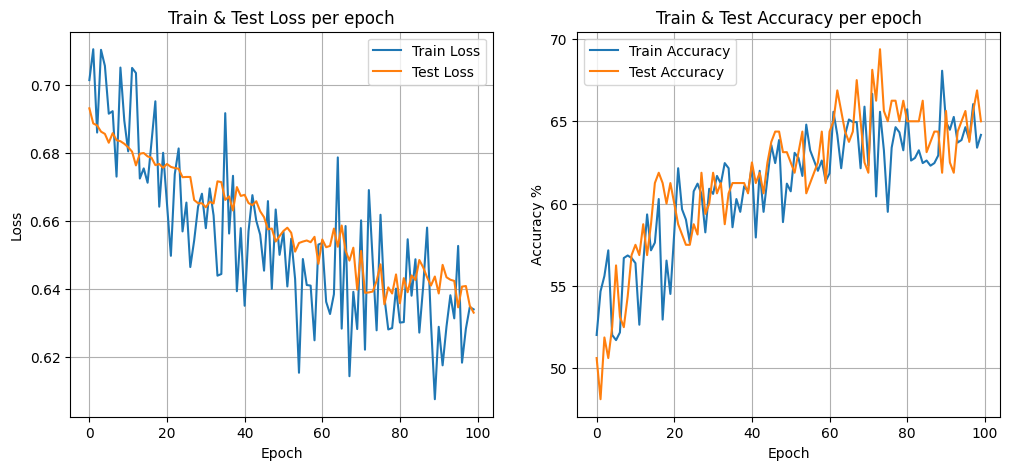

In [652]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()

In [653]:
from torch.utils.data import Subset

In [654]:
train_100_images = Subset(train_data_augmentation, range(100))
test_20_images = Subset(test_data_augmentation, range(20))

len(train_100_images), len(test_20_images)

(100, 20)